In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amazon_reviews = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/Assignment 1/amazon_reviews.csv')
amazon_reviews.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [3]:
amazon_reviews.shape

(999, 10)

In [4]:
reviews = pd.DataFrame()
reviews['reviewText'] = amazon_reviews['reviewText']
reviews['overall'] = amazon_reviews['overall']
reviews.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5.0
1,"I'm a professional OTR truck driver, and I bou...",1.0
2,"Well, what can I say. I've had this unit in m...",3.0
3,"Not going to write a long review, even thought...",2.0
4,I've had mine for a year and here's what we go...,1.0


In [5]:
reviews.isnull().sum()

reviewText    2
overall       0
dtype: int64

In [6]:
reviews = reviews[reviews['reviewText'].notnull()]
reviews.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5.0
1,"I'm a professional OTR truck driver, and I bou...",1.0
2,"Well, what can I say. I've had this unit in m...",3.0
3,"Not going to write a long review, even thought...",2.0
4,I've had mine for a year and here's what we go...,1.0


In [7]:
reviews.shape

(997, 2)

In [8]:
reviews[reviews.duplicated()]

,reviewText,overall


In [9]:
combined_reviews = " ".join(reviews['reviewText'])
print(combined_reviews)

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around! I'm a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connect it to 

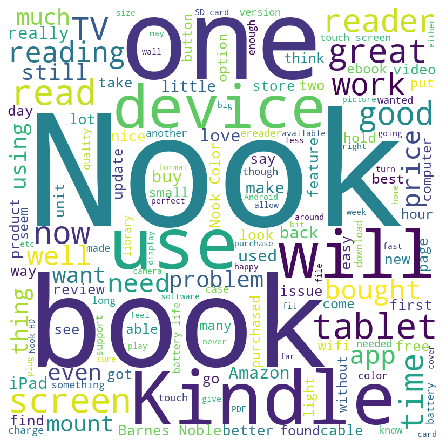

In [10]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).generate(combined_reviews)
plt.figure(figsize = (12,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [11]:
list1 = []
for i in combined_reviews.split():
    list1.append(i)
dictionary1 = {}
for j in list1:
    dictionary1[j] = dictionary1.get(j,0)+1
series1 = pd.Series(dictionary1)
word_freq = pd.DataFrame(series1)
word_freq = word_freq.reset_index().rename(columns = {'index':'Words', 0:'Frequency'})
word_freq.head()

,Words,Frequency
0,We,51
1,got,147
2,this,1168
3,GPS,14
4,for,2000


In [12]:
top_25_words = word_freq.sort_values(ascending = False, by = 'Frequency')
top_25_words.head(25)

,Words,Frequency
12,the,7016
81,to,4356
90,and,4066
22,a,3819
93,I,3782
8,is,2403
20,it,2341
4,for,2000
30,of,1945
41,that,1444


## 1. Clean the Data

In [13]:
from nltk.tokenize import word_tokenize
all_words = word_tokenize(combined_reviews.lower())
print(all_words)

['we', 'got', 'this', 'gps', 'for', 'my', 'husband', 'who', 'is', 'an', '(', 'otr', ')', 'over', 'the', 'road', 'trucker', '.', 'very', 'impressed', 'with', 'the', 'shipping', 'time', ',', 'it', 'arrived', 'a', 'few', 'days', 'earlier', 'than', 'expected', '...', 'within', 'a', 'week', 'of', 'use', 'however', 'it', 'started', 'freezing', 'up', '...', 'could', 'of', 'just', 'been', 'a', 'glitch', 'in', 'that', 'unit', '.', 'worked', 'great', 'when', 'it', 'worked', '!', 'will', 'work', 'great', 'for', 'the', 'normal', 'person', 'as', 'well', 'but', 'does', 'have', 'the', '``', 'trucker', "''", 'option', '.', '(', 'the', 'big', 'truck', 'routes', '-', 'tells', 'you', 'when', 'a', 'scale', 'is', 'coming', 'up', 'ect', '...', ')', 'love', 'the', 'bigger', 'screen', ',', 'the', 'ease', 'of', 'use', ',', 'the', 'ease', 'of', 'putting', 'addresses', 'into', 'memory', '.', 'nothing', 'really', 'bad', 'to', 'say', 'about', 'the', 'unit', 'with', 'the', 'exception', 'of', 'it', 'freezing', 'whic

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
fdist

FreqDist({'the': 7854, '.': 6677, ',': 5824, 'i': 4497, 'to': 4419, 'and': 4210, 'a': 3900, 'it': 3656, 'is': 2497, 'for': 2097, ...})

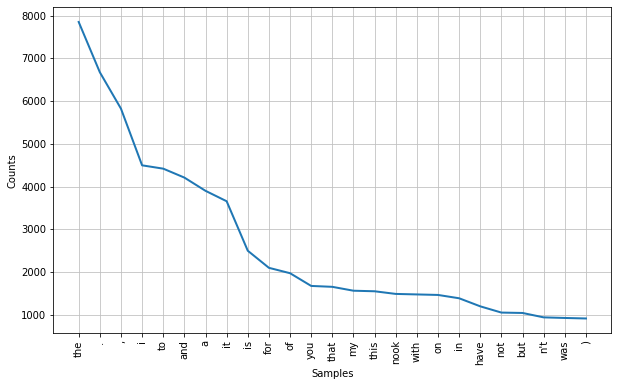

In [15]:
plt.figure(figsize = (10,6))
fdist.plot(25, cumulative = False)
plt.show()

In [16]:
from nltk.corpus import stopwords
from string import punctuation
stop_words = stopwords.words('english')
print(stop_words)
print(list(punctuation))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
stop_words_updated = stop_words + ['..', '...', 'will', 'would', 'can', 'could', "n't"]
print(stop_words_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
all_words_updated = [word for word in all_words if word not in stop_words_updated\
                  and word not in list(punctuation) and len(word) > 2]
print(all_words_updated)

['got', 'gps', 'husband', 'otr', 'road', 'trucker', 'impressed', 'shipping', 'time', 'arrived', 'days', 'earlier', 'expected', 'within', 'week', 'use', 'however', 'started', 'freezing', 'glitch', 'unit', 'worked', 'great', 'worked', 'work', 'great', 'normal', 'person', 'well', 'trucker', 'option', 'big', 'truck', 'routes', 'tells', 'scale', 'coming', 'ect', 'love', 'bigger', 'screen', 'ease', 'use', 'ease', 'putting', 'addresses', 'memory', 'nothing', 'really', 'bad', 'say', 'unit', 'exception', 'freezing', 'probably', 'one', 'million', 'luck', 'contacted', 'seller', 'within', 'minutes', 'email', 'received', 'email', 'back', 'instructions', 'exchange', 'impressed', 'way', 'around', 'professional', 'otr', 'truck', 'driver', 'bought', 'tnd', '700', 'truck', 'stop', 'hoping', 'make', 'life', 'easier', 'rand', 'mcnally', 'listening', 'first', 'thing', 'charging', 'connect', 'laptop', 'install', 'software', 'attempt', 'update', 'software', 'detected', 'problem', 'update', 'wanted', 'home', 

In [19]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
lemma_words = [lemma.lemmatize(i) for i in all_words_updated]
print(len(set(lemma_words)))

9038


### Text Cleaning

In [20]:
def clean_text(text):
    token = word_tokenize(text.lower())
    lemm = [lemma.lemmatize(i) for i in token if i not in stop_words_updated\
           and i not in list(punctuation) and len(i) > 2]
    sentence = ' '.join(lemm)
    return sentence

reviews['clean_reviewText'] = reviews['reviewText'].apply(clean_text)
reviews.head()

,reviewText,overall,clean_reviewText
0,We got this GPS for my husband who is an (OTR)...,5.0,got gps husband otr road trucker impressed shi...
1,"I'm a professional OTR truck driver, and I bou...",1.0,professional otr truck driver bought tnd 700 t...
2,"Well, what can I say. I've had this unit in m...",3.0,well say 've unit truck four day prior garmin ...
3,"Not going to write a long review, even thought...",2.0,going write long review even thought unit dese...
4,I've had mine for a year and here's what we go...,1.0,'ve mine year got try route non truck route te...


## 2. Plot a bigram bar graph on top 25 words.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range = (2,2))
bigrams = count_vect.fit_transform(reviews['clean_reviewText'])
print(count_vect.get_feature_names())

['00 100', '00 300', '00 believe', '00 best', '00 came', '00 dollar', '00 free', '00 great', '00 hit', '00 hold', '00 idea', '00 ipad', '00 like', '00 one', '00 opinion', '00 pleased', '00 price', '00 product', '00 shipped', '00 tablet', '00 thing', '00 title', '00 unless', '00 worth', '000 000', '000 android', '000 apps', '000 book', '000 free', '000 picture', '000 recipe', '000 repeated', '000 rig', '000 title', '000 yes', '01 31', '02 08', '02 wish', '04 14', '08 2010', '09i wanted', '0v 900mah', '0v battery', '10 12', '10 14', '10 15', '10 2013', '10 2014', '10 android', '10 big', '10 built', '10 hour', '10 offering', '10 pdf', '10 second', '10 software', '10 touch', '10 update', '10 using', '100 00', '100 1usgets', '100 250', '100 250v', '100 32gb', '100 battery', '100 book', '100 buck', '100 capable', '100 category', '100 charge', '100 come', '100 dollar', '100 external', '100 full', '100 glad', '100 kindle', '100 luxeon', '100 memory', '100 overall', '100 page', '100 percent', '

In [22]:
DTM = pd.DataFrame(bigrams.toarray(), columns = count_vect.get_feature_names())
DTM.head()

,00 100,00 300,00 believe,00 best,00 came,00 dollar,00 free,00 great,00 hit,00 hold,...,zoom touch,zoom type,zoom update,zoom use,zooming awkward,zooming feature,zooming scrolling,zs15 photo,zune place,zune ve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
top_25_bigrams = DTM.sum().sort_values(ascending = False).head(25)
top_25_bigrams

barnes noble        166
nook color          135
battery life         98
touch screen         96
nook tablet          66
work great           64
kindle fire          61
work well            59
read book            56
wall mount           53
wi fi                47
simple touch         45
customer service     41
android tablet       41
the nook             40
original nook        38
nook simple          37
nook kindle          36
work fine            35
easy install         34
page turn            34
google play          33
kindle nook          33
much better          33
buy book             32
dtype: int64

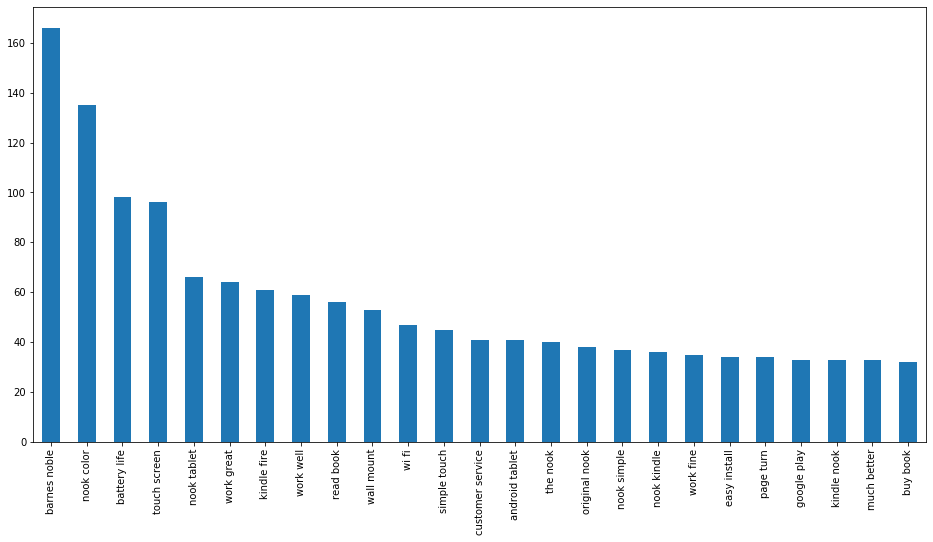

In [24]:
top_25_bigrams.plot(kind = 'bar', figsize = (16,8))
plt.show()

## 3. Find customer concern areas - the top 25 bigrams which includes the below negative words indicating the customer concern areas: 'poor', 'waste', 'bad', 'defective', 'disgusting', 'untrusty', 'worst', 'horrible', 'unexpectedly', 'slow'

In [25]:
bigrams = DTM.columns
print(bigrams)

Index(['00 100', '00 300', '00 believe', '00 best', '00 came', '00 dollar',
       '00 free', '00 great', '00 hit', '00 hold',
       ...
       'zoom touch', 'zoom type', 'zoom update', 'zoom use', 'zooming awkward',
       'zooming feature', 'zooming scrolling', 'zs15 photo', 'zune place',
       'zune ve'],
      dtype='object', length=55110)


In [26]:
negative_words = ['poor', 'waste', 'bad', 'defective', 
                  'disgusting', 'untrusty', 'worst', 
                  'horrible', 'unexpectedly', 'slow']

In [27]:
negative_bigrams = []
for i in bigrams:
    words = i.split()
    if sum(np.in1d(words, negative_words)) >= 1:
        negative_bigrams.append(i)

In [28]:
DTM_subset = DTM[negative_bigrams]
top_25_cutomer_concern_areas = DTM_subset.sum().sort_values(ascending = False).head(25)
top_25_cutomer_concern_areas

waste money            6
the bad                4
slow respond           4
bad review             4
defective nook         3
bad say                3
poor contrast          3
bad thing              3
little slow            3
bad really             3
bad experience         2
defective product      2
excruciatingly slow    2
poor quality           2
slow clunky            2
not bad                2
bad unit               2
overall bad            2
bad nook               2
poor customer          2
poor battery           2
nothing bad            2
device defective       2
going bad              2
pretty poor            2
dtype: int64

## 4. Plot a bar graph for the top 25 customer concern areas.

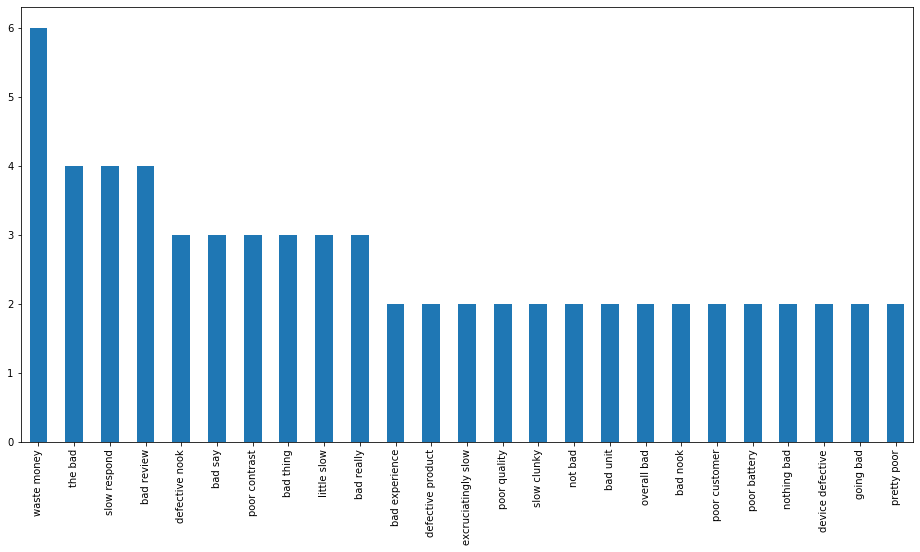

In [29]:
top_25_cutomer_concern_areas.plot(kind = 'bar', figsize = (16,8))